# Imports

In [1]:
import math
import numpy as np
import pandas as pd
import os
import scipy.optimize as optim
import matplotlib.pyplot as plt

## Entendendo Funções Logísticas e Exponenciais

In [2]:
def my_logistic(t):
    return 1000 / (1 + 999 * math.exp(-2 * t))

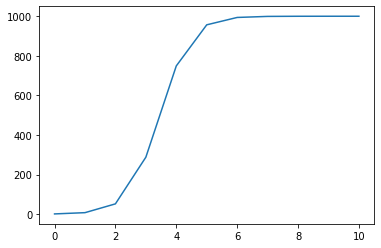

In [3]:
x = np.linspace(0, 10, 11)
y = [my_logistic(i) for i in x]
plt.plot(x, y)

In [4]:
pd.DataFrame({'Time':x, 'Infections':y})

,Time,Infections
0,0.0,1.000000
1,1.0,7.342147
2,2.0,51.820659
3,3.0,287.664369
4,4.0,748.992325
5,5.0,956.613256
6,6.0,993.899378
7,7.0,999.169992
8,8.0,999.887590
9,9.0,999.984785


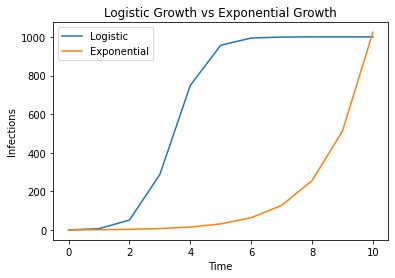

In [5]:
def exponential(t):
    return 1*2**t

plt.plot(x, y)
plt.plot(x, exponential(x))
plt.title('Logistic Growth vs Exponential Growth')
plt.legend(['Logistic', 'Exponential'])
plt.xlabel('Time')
plt.ylabel('Infections')
plt.show()

## Dados de Jacareí

In [6]:
base_dir = os.getcwd()

In [7]:
# Import the data

data = pd.read_csv(f'{base_dir}/CovidDBJac2.csv', sep=';', usecols=[1,2])
#data = data['Confirmados']
#data = data.reset_index(drop=False)
data.columns = ['Confirmados', 'Dias']
data.head(10)

,Confirmados,Dias
0,1,0
1,1,1
2,1,2
3,1,3
4,3,5
5,3,6
6,3,7
7,4,8
8,4,9
9,4,11


In [8]:
# Define funcion with the coefficients to estimate
def my_logistic(t, a, b, c):
    return c / (1 + a * np.exp(-b*t))

In [9]:
# Randomly initialize the coefficients
p0 = np.random.exponential(size=3)
p0

array([0.5728877 , 1.97709534, 3.60370256])

In [10]:
# Set min bound 0 on all coefficients, and set different max bounds for each coefficient
bounds = (0, [10000., 20., 1000000.])

In [11]:
# Convert pd.Series to np.Array and use Scipy's curve fit to find the best Nonlinear Least Squares coefficients
#x = np.array(data['Timestamp']) + 1
#y = np.array(data['Confirmados'])

x = np.array(data['Dias']) + 1
y = np.array(data['Confirmados'])

(a,b,c),cov = optim.curve_fit(my_logistic, x, y, bounds=bounds, p0=p0)

In [12]:
residuals = y-my_logistic(x,a,b,c)
ss_res = np.sum(residuals**2)

ss_tot = np.sum((y-np.mean(y))**2)

r_squared = 1 - (ss_res / ss_tot)

In [13]:
# Show the coefficients
a,b,c,r_squared

(251.804816450402, 0.06038051019209749, 1094.1578289435047, 0.9964389201591975)

In [14]:
# Redefine the function with the new a, b and c
def my_logistic(t):
    return c / (1 + a * np.exp(-b*t))

## Plotagem dos dados reais vs modelo

Text(0, 0.5, 'Confirmados')

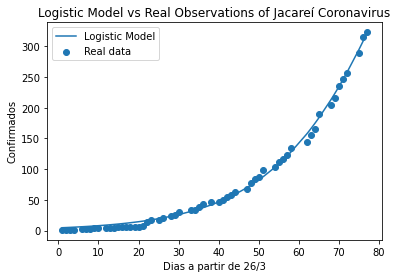

In [15]:
plt.scatter(x, y)
plt.plot(x, my_logistic(x))
plt.title('Logistic Model vs Real Observations of Jacareí Coronavirus')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Dias a partir de 26/3')
plt.ylabel('Confirmados')

In [16]:
# The time step at which the growth is fastest
t_fastest = np.log(a) / b
t_fastest

91.56355638462833

In [17]:
# First way to find the y of the fastest growth moment
y_fastest = c / 2
y_fastest

547.0789144717523

In [18]:
# Second way to find the y of the fastest growth moment
my_logistic(t_fastest)

547.0789144717525

In [19]:
startdate = "26/03/20"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=math.ceil(t_fastest))
print('Dia de atingir o pico: ',pd.Timestamp.isocalendar(enddate))
print('Numero de casos máximo: ',math.ceil(c),' casos confirmados')
print('R² do modelo matemático: ',r_squared)

Dia de atingir o pico:  (2020, 26, 5)
Numero de casos máximo:  1095  casos confirmados
R² do modelo matemático:  0.9964389201591975
